# Plotting Sigmoid Function

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
#for zooming into the plots
#pip install mpld3
# import mpld3
# mpld3.enable_notebook()

## Sigmoid function Formula
One vlaue of w and x  
$S_{w, b}(x) = \frac{1}{1+e^{-(wx + b)}}$

In [3]:
# Defing the sigmoid function
# np.exp is used to give the exponential form
def sigmoid(x, w, b):
    return 1/(1+ np.exp(-(w*x + b)))

In [4]:
# checking the sigmoid function
sigmoid(1, 0.5, 0)

0.6224593312018546

In [5]:
# Play around with this to change the graph and understand what changing the valus of w and b does to your curve.
w = -0.9
b = 0.3
# np.linspace gives regularly spaced function between two interval and how many spaces you want, we are doing this to plot our sigmoid function for different values of x
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b) # broadcasts X(np.array and finds sigmoid function for every value of X)

In [6]:
type(X)

numpy.ndarray

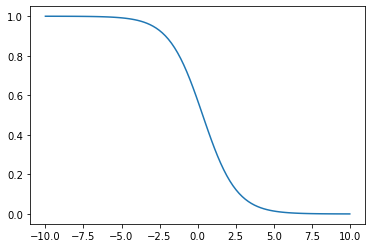

In [7]:
plt.plot(X,Y)
plt.show()

Two values of w and x  
$S_{w_1,w_2}(x_1,x_2) = \frac{1}{1 + e^{-(w_1x_1+ w_2x_2 + b)}} $

In [8]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1/(1 + np. exp(-(w1*x1 +w2*x2 +b)))

In [9]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [10]:
# learning how to plot 3d plots using matplotlib and also importing a library from matplotlib 'from mpl_toolkits import mplot3d'
# we are using capital lettes to denote vectors
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

# we make a meshgrit because X! and X2 are just computing linearspaces for individual variables but we need to compute a joint grid so that we
# are able to get every possible pair is taken care of.
XX1, XX2 = np.meshgrid(X1,X2)
print(X1.shape, X2.shape, XX1.shape, XX2.shape)
 

(100,) (100,) (100, 100) (100, 100)


In [11]:
# increasing w vales means sigmoid becomes sharper. The fsater transition is shown by the thinner band in tge contourf map
w1 = 2
w2 = 0.5
b = 0
Y  = sigmoid_2d(XX1,XX2, w1, w2, b)

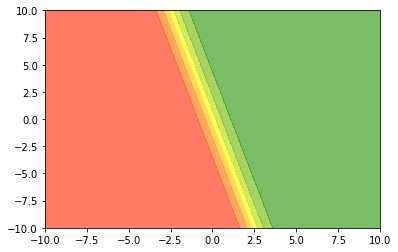

In [12]:
# we can defin custom color maps by adding the code - 
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6) #alpha for more transpirancy
plt.show()


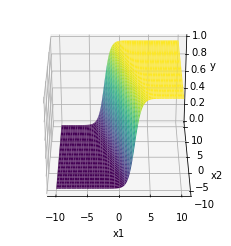

In [13]:
# learning how to use 3d plots in python using matplotlib library
#link for learing the  - https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# the first input is the height at which we are looking from and the second changes the angle in z axis so that we can look at the 3d plots from different angles
ax.view_init(30, 270)

# Compute Loss For a Given Dataset.


In [14]:
# Working with the 1D example and using the brute force approach for each case plot the loss, for each value of x, we will be given a series of w and b, 
# we will also have the corresponding y values
# given the input and the output find out the parameters.
# we are required to find out what w, and b values are for a pair of input output

#Arbrirary vales to generate data
w_unkown = 0.5
b_unknow = 0.25

# 1D example
#It generates number between -1 and 1 but we want it to genrate so that the number is between -10 and 10 ro the range is 20 and we do 10 so that it averages at 0.
X = np.random.random(25) * 20 - 10 
Y = sigmoid(X, w_unkown, b_unknow)


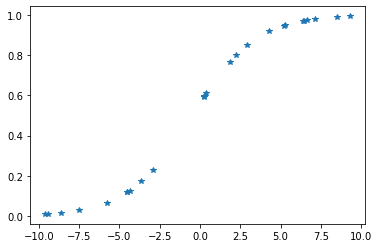

In [15]:
# From these pairs of poin we have to find corresponding w, and b values
plt.plot(X, Y, '*')
plt.show()

In [16]:
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, w_est, b_est))**2 #loss function that we learned Square wrror loss
    return loss

In [17]:
#W = np.linspace(-1,1,100) this is the old value we started with, but after seeing the plot we want to eliminate -ve values of w as it was giving loss-  so we put it in the positive domain
W = np.linspace(0,2,100)
B = np.linspace(-1,1,100)

WW, BB = np.meshgrid(W,B)

# Loss should be a np.array of the same size as WW
Loss = np.zeros(WW.shape)


In [18]:
WW.shape

(100, 100)

In [19]:
#we are going to iterate throug the 100, 100 in WW and for each such value we are going to compute the loss
for i in range(WW.shape[0]):        #iterate over the rows
    for j in range(WW.shape[1]):    #iterate over the column
        Loss[i,j] = calculate_loss(X, Y, WW[i, j], BB[i, j])
        

Text(0.5, 0, 'Loss')

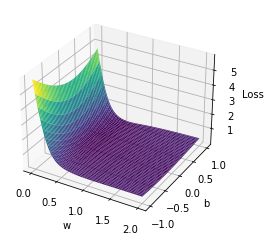

In [20]:
# This is a plot of loss so that we can change the value of w, and b manually
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

# the first input is the height at which we are looking from and the second changes the angle in z axis so that we can look at the 3d plots from different angles
#ax.view_init(30, 270)

# as we are able to see in this plot, that the -ve number of w is very bad as it is giving loss

In [21]:
# np.argmin will tell us the coordinate of the number which is the min in the given list
# But as Loss is the 2d array, so we will have to manually find the row and column
ij = np.argmin(Loss)


In [22]:
# Here i is the row and we find that by taking 'ij' and dividing it by no of column
i =  int(np.floor(ij/Loss.shape[1]))
# having idnetified the row I know how many entries have finished before my row and subtracting that value by ij gives the current column
j = int(ij - i * Loss.shape[1])
print(i ,',' ,j)

62 , 25


In [23]:
#To find the corresponding weights and biases of the the min. coordinates loss
print(WW[i ,j],BB[i, j])

0.5050505050505051 0.2525252525252526


By plotting this, we are able to get a sence of given the parameters.
The first plot we had => x1, x2 as (INPUT) features and the z axis was y (the sigmoid function, basically the prediction -OUTPUT) of the model  
The second plot we had => w and b(PARAMETERS) and z axis was y (good se to parameters or not - LOSS)

In algos, where we learn the LEARNING ALGORITM  we are concerned about the second plot - the loss is in the z axis and we would like tokzkz go towards low loss 

# Class For Sigmoid Neuron


In [24]:
class SigmoidNeuron:

    def __init__(self):
        self.w = None
        self.b = None

    # This is wx +b the perceptron pass, we will use this in the sigmoid function that we make
    # w has T written in fromt of it because we have taken Transpose
    def perceptron(self,x):
        return np.dot(x, self.w.T) +self.b
    
    # we are using the formula for sigmid and passing our perceptron model to it
    # we have used floats as we want our output to have fractions
    def sigmoid(self,x):
        return 1.0/(1.0 +np.exp(-x))

    # COMPUTING GRADIENTS - We derived a formula, we could have also used pytouch or Tensorflow but we made our own function
    def grad_w(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 -y_pred) * x #formula for the gradient decent of w
    
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 -y_pred) #formula for the gradient decent of b
    
    def fit(self,x,y, epochs = 1, learning_rate = 1, initialise = True):

        if initialise:
            # Initialising w, b
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0

        for i in range(epochs):
            dw = 0
            db = 0
            for x,y in zip(X,Y):
                dw += self.grad_w(x,y)
                db += self.grad_b(x,y)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db#

# Fit for Toy Data

In [25]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [26]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.5, True)

In [27]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
   # initialisation array of size same as XX1 filled with zeros
  YY = np.zeros(XX1.shape)
  # we are iterating through the linearspaces and we have to do that in an orderly manner i.e. X2 firt and then X1
  for i in range(X2.size):
    for j in range(X1.size):
      #for each value we would like to compute what is the sigmoid neuron going to be
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
      # plotting the contoure of the sigmoid neuron
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
    # plotting the data that we are fittng for
  # X axis will have all the values of the FIRSRT column - X[:,0] and Y axis to have all the valeus of the SECOND column - X[:,1]
  # Ground truth zero or one will be determined by the color
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()

[[-1.29709319 -0.57800805]] [0.00152068]
[[-1.17782248 -0.68461465]] [0.01448135]
[[-1.03028638 -0.7533632 ]] [0.00908096]
[[-0.81618219 -0.82032254]] [-0.00793613]
[[-0.46221153 -0.91036931]] [-0.03047321]
[[ 0.07924283 -1.01507695]] [-0.01677237]
[[ 0.29900738 -0.9208306 ]] [0.01428003]
[[ 0.52606221 -0.70576596]] [0.05356636]
[[ 0.82293424 -0.33333173]] [0.07149806]
[[ 0.95248354 -0.26116448]] [0.00431534]
[[ 0.99779177 -0.38924891]] [-0.06183713]
[[ 1.10061248 -0.31772218]] [-0.11548223]
[[ 1.13539609 -0.41607439]] [-0.16892783]
[[ 1.21119162 -0.37543258]] [-0.2127165]
[[ 1.24774936 -0.42945796]] [-0.2553335]
[[ 1.30070982 -0.42242024]] [-0.29202045]
[[ 1.33871175 -0.44616899]] [-0.32665032]
[[ 1.37870995 -0.45432917]] [-0.35796398]
[[ 1.41402042 -0.46722852]] [-0.38709604]
[[ 1.44758874 -0.47759881]] [-0.41405291]
[[ 1.4789095  -0.48774718]] [-0.43917095]
[[ 1.50840631 -0.49721265]] [-0.46263746]
[[ 1.53624136 -0.50615865]] [-0.48463531]
[[ 1.56258802 -0.51462576]] [-0.50531718]
[

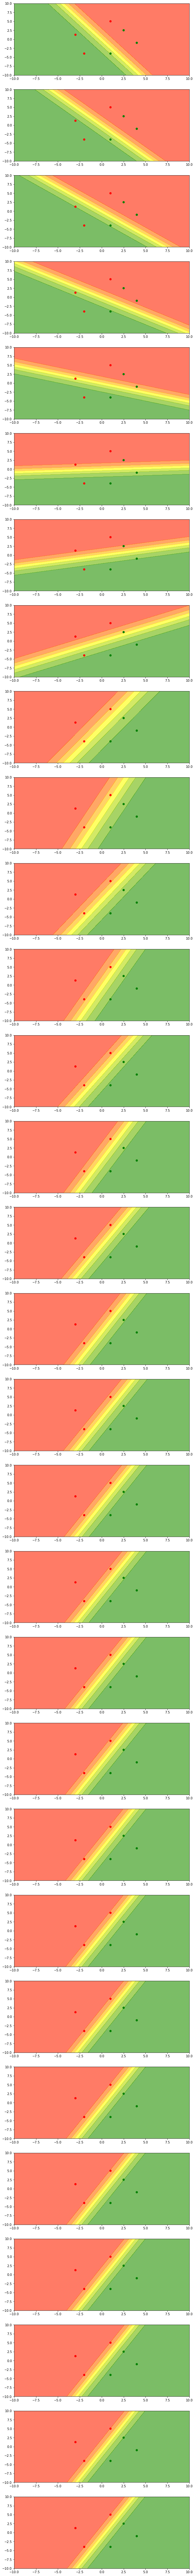

In [28]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
# To fit our plots
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  # to show the different plots
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

  #we want the values in the output to change slowely
  # large learning rates could be bad chnages in the distict boundry, and small learning rates could be bad because within the epochs that we have we may not be able tofind a good enough solution
    

# Working with real Example

## Load Data

In [29]:
data = pd.read_csv('mobile_cleaned.csv')

In [30]:
#head is a method always put () at the end of it
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [31]:
data.shape

(341, 88)

In [32]:
# rows as individual phones and column as idividual features
X = data.drop('Rating', axis = 1) #axis =1 as we are dropping a columb, it is a good measure to specify that even though it is ovious
X.head()



,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,0,1,0,0,0,1


In [33]:
type(X)

pandas.core.frame.DataFrame

In [34]:
Y = data['Rating'].values
print(Y)

[4.5 4.5 4.4 4.3 4.4 4.5 4.3 4.1 4.3 4.5 4.5 4.  4.4 4.4 4.4 4.4 4.5 4.4
 4.4 4.4 4.4 4.5 4.4 4.3 4.2 4.3 4.3 4.6 4.4 4.5 3.9 4.2 4.3 4.2 4.3 4.3
 4.2 4.4 4.1 3.8 4.4 4.6 4.3 4.5 4.5 4.2 3.9 4.3 4.  4.3 4.3 3.9 4.2 4.5
 4.  4.6 4.2 2.8 4.4 4.3 4.2 4.4 4.4 4.  4.4 4.4 4.1 4.5 4.3 3.9 4.3 4.1
 4.1 4.2 3.4 4.2 4.6 3.8 4.3 4.5 4.2 4.5 4.5 4.  4.1 4.4 4.5 4.1 4.5 4.3
 4.5 3.9 3.9 4.4 4.4 4.4 4.  4.1 4.1 4.4 4.3 4.3 4.2 4.3 3.4 4.3 4.3 4.2
 4.6 4.8 4.4 3.4 3.7 4.2 4.3 4.4 4.3 4.2 4.1 4.3 4.  3.9 4.4 4.4 3.9 3.1
 3.7 4.2 4.4 4.  4.  4.1 4.2 4.3 4.2 4.3 4.1 3.6 4.1 4.  3.8 3.7 4.3 4.1
 4.1 4.5 4.  4.3 3.6 4.1 4.5 3.5 4.  4.3 4.6 3.5 3.9 4.1 3.9 3.8 4.4 4.3
 4.  3.9 4.4 4.7 3.9 4.5 3.7 4.  4.3 4.1 4.8 4.1 4.  4.7 4.  4.1 4.  3.4
 4.1 3.9 3.1 4.1 3.7 3.4 3.9 4.3 4.1 3.7 3.8 4.  3.8 4.6 3.4 3.3 3.2 3.5
 4.3 4.1 4.  3.8 4.3 4.1 4.  3.8 3.8 3.9 4.1 3.7 4.2 4.  4.2 4.4 4.1 3.4
 4.2 4.4 3.9 3.9 4.4 4.2 4.5 4.5 4.2 4.  4.2 3.5 3.7 4.3 5.  3.5 4.4 3.7
 4.3 3.9 4.3 3.8 3.8 4.3 5.  4.1 3.  4.4 3.  4.  4.

In [35]:
# we are taking Y as a numpy array as later processing them is much simpler
type(Y)

numpy.ndarray

**There is a real value Y available and there is a binarised Y that is avialable we would like to train with the real valued Y, because our sigmoid neuron can capture real**

**valued output but eventually capture the accuracy in the binarised output** 

**Now let us try and conver the above real valued Y in to a binarised Y**


In [36]:
threshold = 4.2
# insted of changing Y directly we are adding a column to the dataframe named Class which will contain binarized vales of Y
#if >= threshold it will send 1 to the column else it will send 0.and
data['Class'] = (data['Rating']  >= threshold).astype(np.int) # astype(np.int) converts the output of TRUE/FALSE into integer values

In [37]:
# Gives the number of 1 and 0s in the data
# play around with the threshold in the above cell to make the percentage of 0's and 1's to be closest
data['Class'].value_counts(normalize = True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [38]:
Y_binarised = data['Class'].values

In [39]:
type(Y_binarised)

numpy.ndarray

## Sandardisation

### Example of sklearn - StandardScalar

**It is difficult to create a model to make with such large range within them for eg. screen size has large numbers, and internal memory has small values**

**Each of the column in the table that is used must have 0 mean and have a standard daviation of 1**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [40]:
from sklearn.preprocessing import StandardScaler 

In [43]:
# just for demonstration of the StandardScaler
R = np.random.random([100,1])

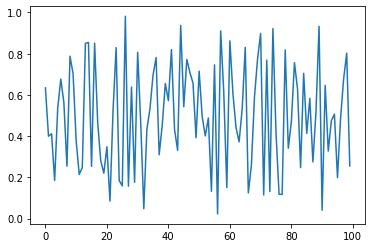

In [44]:
plt.plot(R)
plt.show()

In [46]:
# Manual Calculations
print("Mean ",np.mean(R))
print("Standard Deviation ",np.std(R))

Mean  0.4987833369458153
Mean  0.25454134790453997


In [47]:
# first we have to import an intance of standar scalar
scalar = StandardScaler()

In [48]:
scalar.fit(R)

StandardScaler()

In [49]:
#claculated by standard scalar
scalar.mean_

array([0.49878334])

In [50]:
RT = scalar.transform(R)

In [51]:
np.mean(RT)

#output has e^-16 so the number is very very close to 0

2.6645352591003756e-16

In [52]:
np.std(RT)
# output is vert very close to 1 

0.9999999999999998

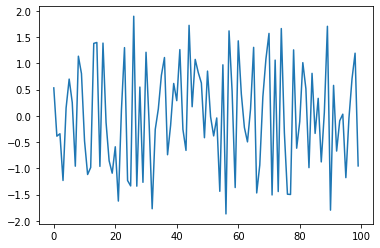

In [53]:
plt.plot(RT)

# The new plot looks exaxtly like the old plot but what has changed that the Y axis such that now in the modified range - mean is 0 and standard diviaton is 1